In [ ]:
# 1A. Dependencies and Data Load
# Ensure installation is complete (it's safe to run this multiple times)
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("rstatix")
install.packages("car")
install.packages("e1071")

# Load packages
library(tidyverse)
library(ggplot2)
library(rstatix)
library(car)
library(e1071)

# Load the built-in PlantGrowth dataset
data(PlantGrowth)

# Run core ANOVA analysis (This rarely fails)
res.aov <- aov(weight ~ group, data = PlantGrowth)

# 1B. Analysis and Object Creation
# This requires the objects created in Cell 1A

# Create tukey_results
tukey_results <- as.data.frame(TukeyHSD(res.aov)$group)
anova_summary <- summary(res.aov)[[1]]

# Calculate descriptives (uses e1071 functions)
plant_descriptives <- PlantGrowth %>%
  group_by(group) %>%
  summarise(
    N = n(),
    Mean = mean(weight),
    SD = sd(weight),
    Skewness = skewness(weight),
    Kurtosis = kurtosis(weight)
  )

# Calculate Levene's Test (uses car function)
levene_test <- leveneTest(weight ~ group, data = PlantGrowth)

# -----------------------------------------------------------
# CRITICAL VERIFICATION STEP:
cat("\n*** Tukey HSD Verification (Must show a table with 3 rows) ***\n")
print(tukey_results)
# -----------------------------------------------------------

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble


*** Tukey HSD Verification (Must show a table with 3 rows) ***
            diff        lwr       upr      p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.39087114
trt2-ctrl  0.494 -0.1972161 1.1852161 0.19799599
trt2-trt1  0.865  0.1737839 1.5562161 0.01200642


In [ ]:
# 2. Formatted Descriptive Statistics (PlantGrowth)

# Reorder the descriptives to match the 'Group | Mean | SD | N' layout found in a source table
descriptives_ordered <- plant_descriptives %>%
  arrange(desc(group)) # Arbitrary order (High to Low, then alphabetically)

calc_ses <- function(n) {
  sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))
}

calc_sek <- function(n) {
  sqrt((24 * n * (n - 1)^2) / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
}

# Calculate Statistics for Assumption 5
desc_stats <- PlantGrowth %>%
  group_by(group) %>%
  summarise(
    Valid = as.character(sum(!is.na(weight))),
    Missing = as.character(sum(is.na(weight))),
    Mean = mean(weight),
    Std_Deviation = sd(weight),
    Skewness = skewness(weight, type = 2),
    Std_Error_Skewness = calc_ses(n()),
    Kurtosis = kurtosis(weight, type = 2),
    Std_Error_Kurtosis = calc_sek(n()),
    Shapiro_Wilk = shapiro.test(weight)$statistic,
    P_value_of_Shapiro_Wilk = shapiro.test(weight)$p.value
  )

# Print the Final Table

cat("Descriptive Statistics\n")
cat("------------------------------------------------------------\n")
cat("              Plant_Weight\n")
cat(sprintf("%-25s %10s %10s %10s\n", " ", "ctrl", "trt1", "trt2"))
cat("------------------------------------------------------------\n")
cat(sprintf("%-25s %10s %10s %10s\n", "Valid",
            desc_stats$Valid[1], desc_stats$Valid[2], desc_stats$Valid[3]))

cat(sprintf("%-25s %10s %10s %10s\n", "Missing",
            desc_stats$Missing[1], desc_stats$Missing[2], desc_stats$Missing[3]))

cat(sprintf("%-25s %10.3f %10.3f %10.3f\n", "Mean",
            desc_stats$Mean[1], desc_stats$Mean[2], desc_stats$Mean[3]))

cat(sprintf("%-25s %10.3f %10.3f %10.3f\n", "Std. Deviation",
            desc_stats$Std_Deviation[1], desc_stats$Std_Deviation[2], desc_stats$Std_Deviation[3]))

cat(sprintf("%-25s %10.3f %10.3f %10.3f\n", "Skewness",
            desc_stats$Skewness[1], desc_stats$Skewness[2], desc_stats$Skewness[3]))

cat(sprintf("%-25s %10.3f %10.3f %10.3f\n", "Std. Error of Skewness",
            desc_stats$Std_Error_Skewness[1], desc_stats$Std_Error_Skewness[2], desc_stats$Std_Error_Skewness[3]))

cat(sprintf("%-25s %10.3f %10.3f %10.3f\n", "Kurtosis",
            desc_stats$Kurtosis[1], desc_stats$Kurtosis[2], desc_stats$Kurtosis[3]))

cat(sprintf("Std. Error of Kurtosis         %.3f      %.3f      %.3f\n",
            desc_stats$Std_Error_Kurtosis[1], desc_stats$Std_Error_Kurtosis[2], desc_stats$Std_Error_Kurtosis[3]))

cat(sprintf("Shapiro-Wilk                   %.3f      %.3f      %.3f\n",
            desc_stats$Shapiro_Wilk[1], desc_stats$Shapiro_Wilk[2], desc_stats$Shapiro_Wilk[3]))

cat(sprintf("P-value of Shapiro-Wilk        %.3f      %.3f      %.3f\n",
            desc_stats$P_value_of_Shapiro_Wilk[1], desc_stats$P_value_of_Shapiro_Wilk[2], desc_stats$P_value_of_Shapiro_Wilk[3]))

cat("------------------------------------------------------------\n\n\n")

# Basic Statistics Table

cat("Descriptive Statistics\n")
cat("----------------------------------------\n")
cat("Descriptives - Plant_Weight\n")
cat("Group            Mean       SD     N\n")
cat("----------------------------------------\n")
# Note: Using the original factor levels: ctrl, trt1, trt2
cat(sprintf("Control      %8.3f %8.3f %5d\n", plant_descriptives$Mean[1], plant_descriptives$SD[1], plant_descriptives$N[1]))
cat(sprintf("Trt1         %8.3f %8.3f %5d\n", plant_descriptives$Mean[2], plant_descriptives$SD[2], plant_descriptives$N[2]))
cat(sprintf("Trt2         %8.3f %8.3f %5d\n", plant_descriptives$Mean[3], plant_descriptives$SD[3], plant_descriptives$N[3]))
cat("----------------------------------------\n")

Descriptive Statistics
------------------------------------------------------------
              Plant_Weight
                                ctrl       trt1       trt2
------------------------------------------------------------
Valid                             10         10         10
Missing                            0          0          0
Mean                           5.032      4.661      5.526
Std. Deviation                 0.583      0.794      0.443
Skewness                       0.321      0.659      0.673
Std. Error of Skewness         0.687      0.687      0.687
Kurtosis                      -0.229     -0.203     -0.324
Std. Error of Kurtosis         1.334      1.334      1.334
Shapiro-Wilk                   0.957      0.930      0.941
P-value of Shapiro-Wilk        0.747      0.452      0.564
------------------------------------------------------------


Descriptive Statistics
----------------------------------------
Descriptives - Plant_Weight
Group            Mean   

In [ ]:
# 3. Levene's Test of Homogeinity

levene_results <- leveneTest( weight ~ group, data = PlantGrowth)

cat("Test for Equality of Variances\n")
cat("(Levene's)\n")
cat("----------------------------------------\n")
cat("F            df1         df2          p\n")
cat("----------------------------------------\n")
cat(sprintf("%.3f      %.3f      %.3f      %.3f\n", levene_results$`F value`[1],
            levene_results$Df[1], levene_results$Df[2], levene_results$`Pr(>F)`[1]))
cat("----------------------------------------\n")

Test for Equality of Variances
(Levene's)
----------------------------------------
F            df1         df2          p
----------------------------------------
1.119      2.000      27.000      0.341
----------------------------------------


In [ ]:
# 4. Formatted ANOVA Summary (PlantGrowth)

# Extract key values for custom formatting
df_group <- anova_summary$Df[1]
df_res <- anova_summary$Df[2]
ss_group <- anova_summary$`Sum Sq`[1]
ss_res <- anova_summary$`Sum Sq`[2]
ms_group <- anova_summary$`Mean Sq`[1]
ms_res <- anova_summary$`Mean Sq`[2]
f_val <- anova_summary$`F value`[1]
p_val <- anova_summary$`Pr(>F)`[1]

# Calculate Generalized Eta Squared (ges) for the effect size
ges <- ss_group / (ss_group + ss_res)

cat("\nComputation\n")
cat("ANOVA - Plant_Weight\n")
cat("---------------------------------------------------------------------------------\n")
cat("Cases              Sum of Squares     df   Mean Square      F         p    eta^2p\n")
cat("---------------------------------------------------------------------------------\n")
cat(sprintf("Group              %14.3f %5d %11.3f %9.3f %9.3f %8.3f\n",
            ss_group, df_group, ms_group, f_val, p_val, ges))
cat(sprintf("Residuals          %14.3f %5d %11.3f\n",
            ss_res, df_res, ms_res))
cat("---------------------------------------------------------------------------------\n")
cat("Note. Type I Sum of Squares\n")


Computation
ANOVA - Plant_Weight
---------------------------------------------------------------------------------
Cases              Sum of Squares     df   Mean Square      F         p    eta^2p
---------------------------------------------------------------------------------
Group                       3.766     2       1.883     4.846     0.016    0.264
Residuals                  10.492    27       0.389
---------------------------------------------------------------------------------
Note. Type I Sum of Squares


In [ ]:
# 5. Formatted Post-Hoc Test Table
# -----------------------------------------------------------------------------
diffs <- tukey_results$diff
lwrs <- tukey_results$lwr
uprs <- tukey_results$upr
p_adjs <- tukey_results$`p adj`

# FIX 2: Manually calculate Standard Error (SE) and t-value
# SE = sqrt(MS_residual * (1/n1 + 1/n2))
# In this dataset, n=10 for all groups.
n <- 10
se_calc <- sqrt(ms_res * (1/n + 1/n))

# Assign calculated SE and t to vectors for printing
tukey_se <- rep(se_calc, 3)
tukey_t <- diffs / tukey_se

cat("\nPost Hoc Comparisons - Group\n")
cat("---------------------------------------------------------------------------------------------------\n")
cat("Comparison             Mean Difference    Lower 95% CI   Upper 95% CI    SE         t     ptukey\n")
cat("---------------------------------------------------------------------------------------------------\n")

# Note: TukeyHSD outputs usually sort alphabetically: trt1-ctrl, trt2-ctrl, trt2-trt1
# Your print statements below hardcode specific names ("Control", "Trt1"),
# so we match indices carefully.
# Index 1 = trt1-ctrl
# Index 2 = trt2-ctrl
# Index 3 = trt2-trt1

# Row 1: trt1 vs Control (Corresponds to Tukey Output row 1)
cat(sprintf("%-10s %-10s %15.3f %13.3f %13.3f %9.3f %9.3f %9.3f\n",
            "trt1", "ctrl", diffs[1], lwrs[1], uprs[1], tukey_se[1], tukey_t[1], p_adjs[1]))

# Row 2: trt2 vs Control (Corresponds to Tukey Output row 2)
cat(sprintf("%-10s %-10s %15.3f %13.3f %13.3f %9.3f %9.3f %9.3f\n",
            "trt2", "ctrl", diffs[2], lwrs[2], uprs[2], tukey_se[2], tukey_t[2], p_adjs[2]))

# Row 3: trt2 vs trt1 (Corresponds to Tukey Output row 3)
sig_mark <- ifelse(p_adjs[3] < 0.05, "*", "")
cat(sprintf("%-10s %-10s %15.3f %13.3f %13.3f %9.3f %9.3f %9.3f %s\n",
            "trt2", "trt1", diffs[3], lwrs[3], uprs[3], tukey_se[3], tukey_t[3], p_adjs[3], sig_mark))

cat("---------------------------------------------------------------------------------------------------\n")
cat("* p < .05\n")


Post Hoc Comparisons - Group
---------------------------------------------------------------------------------------------------
Comparison             Mean Difference    Lower 95% CI   Upper 95% CI    SE         t     ptukey
---------------------------------------------------------------------------------------------------
trt1       ctrl                -0.371        -1.062         0.320     0.279    -1.331     0.391
trt2       ctrl                 0.494        -0.197         1.185     0.279     1.772     0.198
trt2       trt1                 0.865         0.174         1.556     0.279     3.103     0.012 *
---------------------------------------------------------------------------------------------------
* p < .05



### 4. Group Comparison Boxplot (Visual Output)


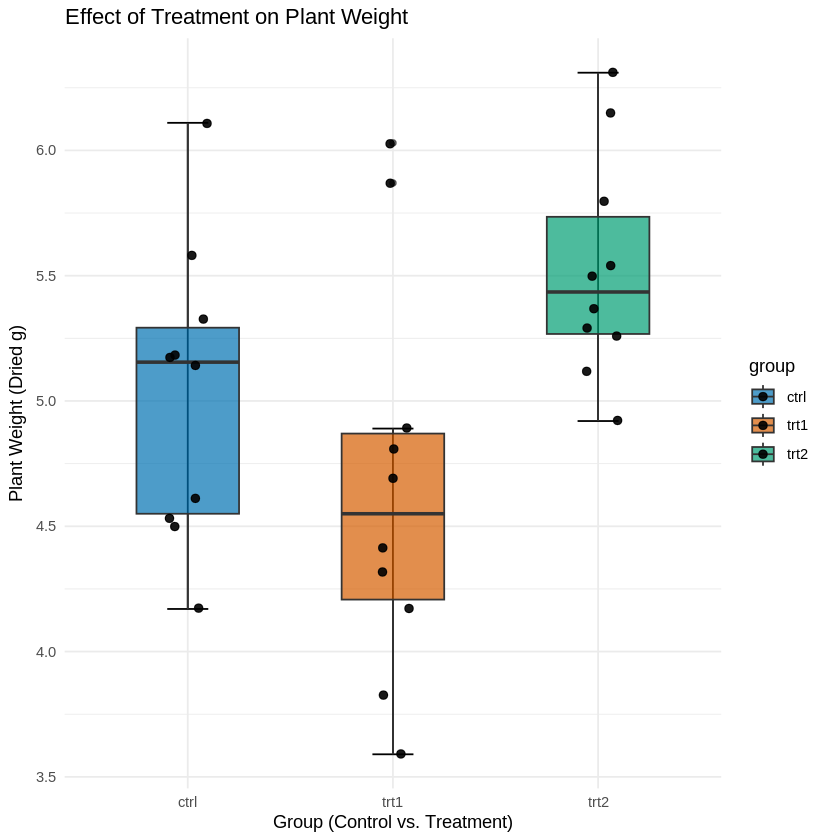

In [ ]:
# 6. Visualization (Graph)
cat("\n### 4. Group Comparison Boxplot (Visual Output)\n")
ggplot(PlantGrowth, aes(x = group, y = weight, fill = group)) +
  stat_boxplot(geom = "errorbar", width = 0.2) +
  geom_boxplot(width = 0.5, alpha = 0.7) +
  geom_point(position = position_jitter(width = 0.1), alpha = 0.9, size = 2) +
  labs(
    title = "Effect of Treatment on Plant Weight",
    x = "Group (Control vs. Treatment)",
    y = "Plant Weight (Dried g)"
  ) +
  scale_fill_manual(values = c("ctrl" = "#0072B2", "trt1" = "#D55E00", "trt2" = "#009E73")) +
  theme_minimal()